In [1]:
from acoustics import Signal
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
from IPython.display import Audio

In [2]:
import os
import subprocess
PATH = os.path.join(os.getcwd(), "../analysis")

def build_attribute(attr):
    return subprocess.check_output(["nix-build", PATH, "-A", attr], universal_newlines=True, stderr=subprocess.STDOUT).rstrip()

def build_expression(expr):
    return subprocess.check_output(["nix-build", PATH, "-E", expr], universal_newlines=True, stderr=subprocess.STDOUT).rstrip()

In [3]:
import pandas as pd
from h5store import h5load

immission, _ = h5load(build_attribute("test_event.immission.audio"))
emission, _ = h5load(build_attribute("test_event.emission.audio"))
synthesis, _ = h5load(build_attribute("test_event.synthesis.audio"))
auralisation, meta = h5load(build_attribute("test_event.auralisation.audio"))

fs = meta['fs']
audio = pd.DataFrame({'immission':immission, 'emission':emission, 'synthesis':synthesis, 'auralisation':auralisation})
audio = audio.fillna(value=0.0)

In [4]:
audio.head()

auralisation    emission  immission   synthesis
2013-09-04 11:12:51.500000000           0.0 -286.187252   0.112373   43.141381
2013-09-04 11:12:51.500022676           0.0 -515.579409   0.122589  130.328063
2013-09-04 11:12:51.500045352           0.0 -523.111304   0.143021  155.533838
2013-09-04 11:12:51.500068028           0.0 -455.342569   0.132805  163.544410
2013-09-04 11:12:51.500090704           0.0 -631.601489   0.143021  180.855979

In [5]:
signals = Signal(audio.values.T, fs)
labels = list(audio.columns)

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/acoustics/standards/iec_61672_1_2013.py:103: RuntimeWarning: divide by zero encountered in log10
  levels = 10.0 * np.log10( average(pressure**2.0, sample_frequency, averaging_time) / reference_pressure**2.0)


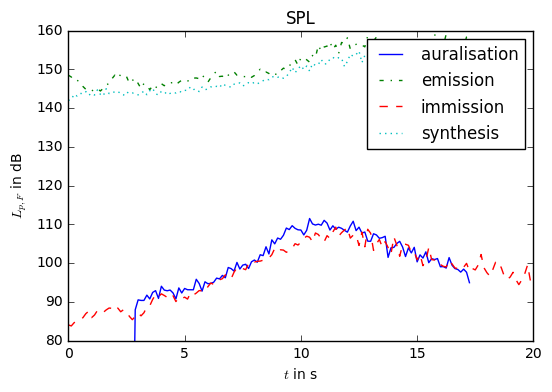

In [6]:
fig = signals.plot_levels(labels=labels, ylim=(80., 160.))

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:7019: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


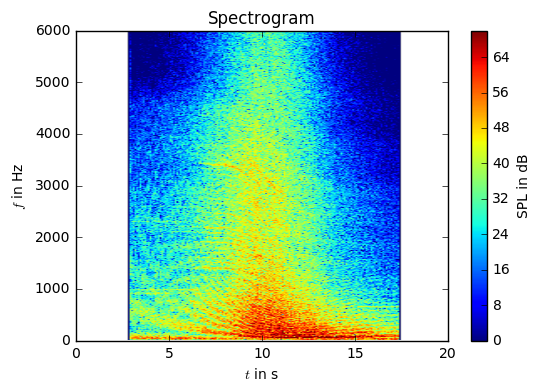

In [7]:
fig = signals[0].plot_spectrogram(ylim=(0.0, 6000.0), clim=(0.0, 70.0))

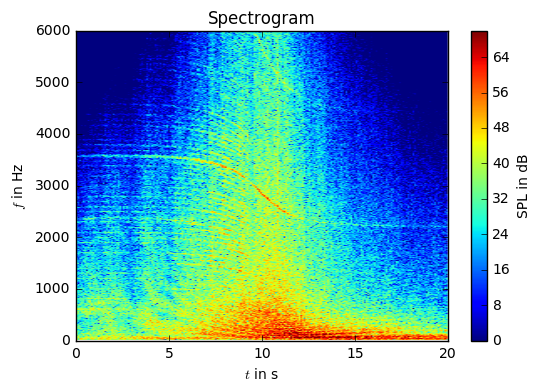

In [8]:
fig = signals[2].plot_spectrogram(ylim=(0.0, 6000.0), clim=(0.0, 70.0))

In [9]:
immission = signals[[0,2],:]

In [10]:
immission.channels

2

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/acoustics/standards/iec_61672_1_2013.py:103: RuntimeWarning: divide by zero encountered in log10
  levels = 10.0 * np.log10( average(pressure**2.0, sample_frequency, averaging_time) / reference_pressure**2.0)


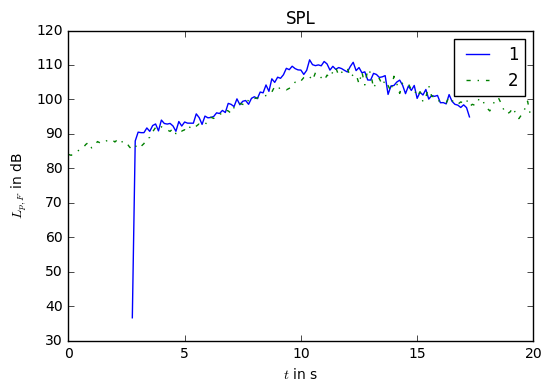

In [11]:
fig = immission.plot_levels()

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


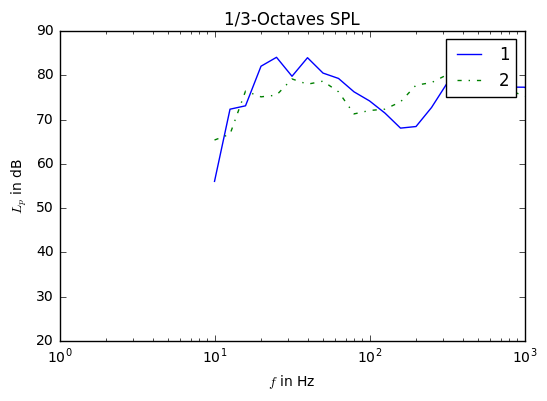

In [12]:
fig = immission.pick(3.0, 5.0).plot_third_octaves(xlim=(1, 1000))

In [14]:
Audio(data=audio.auralisation, rate=fs)

In [13]:
Audio(data=audio.immission, rate=fs)

In [15]:
recording = Signal(audio.immission, fs).pick(3,17)
auralisation = Signal(audio.auralisation, fs).pick(3,17)

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [16]:
recording.octaves()[1].leq() - auralisation.octaves()[1].leq()

array([ 0.25565933,  1.38849466, -2.43523164, -1.51389028, -3.14090269,
       -3.31388846, -2.90974123, -1.37248797, -1.73330807, -0.71435145])

In [17]:
auralisation.octaves()[1].leq()

array([ 87.97093059,  93.86069509,  99.61083367,  98.50383247,
        98.02386477,  95.83663289,  91.52959202,  89.49852148,
        87.20179754,  75.44914315])

In [18]:
recording_levels = Signal(audio.immission, fs).pick(3,17).octaves()[1].levels()[1]

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [19]:
auralisation_levels = Signal(audio.auralisation, fs).pick(3,17).octaves()[1].levels()[1]

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


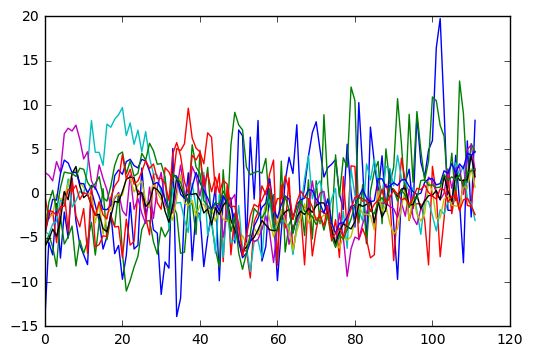

In [20]:
fig = plt.plot((recording_levels - auralisation_levels).T)

In [21]:
(recording_levels - auralisation_levels).T.var(axis=0)

array([ 36.00310462,  29.90897363,  15.56344822,  15.88419766,
        10.75413918,   4.2587175 ,   4.74638257,   5.6895016 ,
         7.8734243 ,   4.93927059])

In [22]:
Signal(audio.immission, fs).pick(3,17).leq()

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


103.14578643688088

In [23]:
Signal(audio.auralisation, fs).pick(3,17).leq()

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


105.01796668258149

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


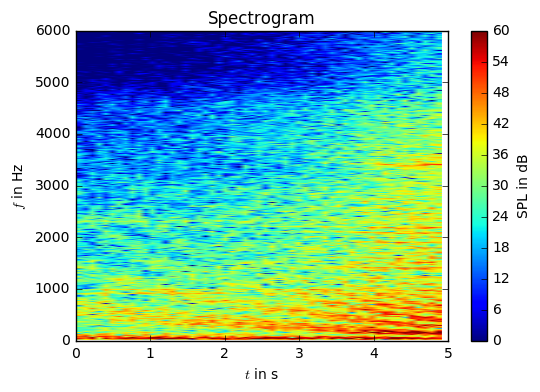

In [24]:
fig = Signal(audio.auralisation, fs).pick(3, 8).plot_spectrogram(ylim=(0.0, 6000.0), clim=(0.0, 60.0))

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


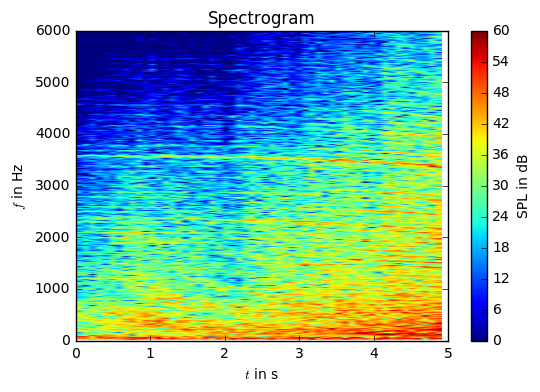

In [25]:
fig = Signal(audio.immission, fs).pick(3, 8).plot_spectrogram(ylim=(0.0, 6000.0), clim=(0.0, 60.0))

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


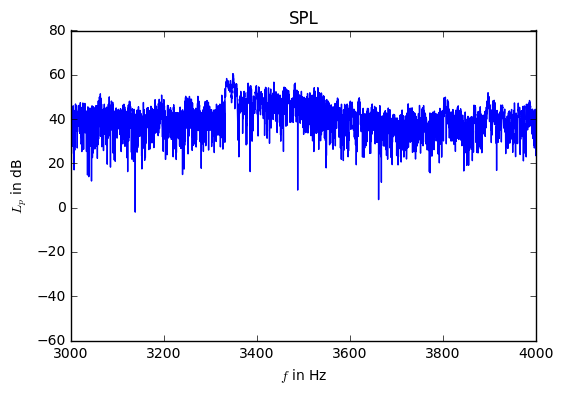

In [26]:
fig = Signal(audio.immission, fs).pick(3, 8).plot_power_spectrum(xlim=(3000., 4000.), xscale='linear')

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


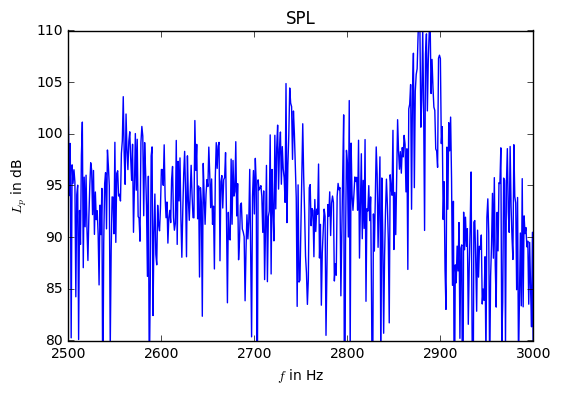

In [27]:
fig = Signal(audio.emission, fs).pick(0, 1).plot_power_spectrum(xlim=(2500., 3000.), xscale='linear', ylim=(80, 110))

In [28]:
from acoustics.signal import lowpass
import numpy as np

/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/nix/store/zz9p6nafyna24vmd1fp3z9819dk23zmi-python3-3.5.2-env/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


(2500, 3000.0)

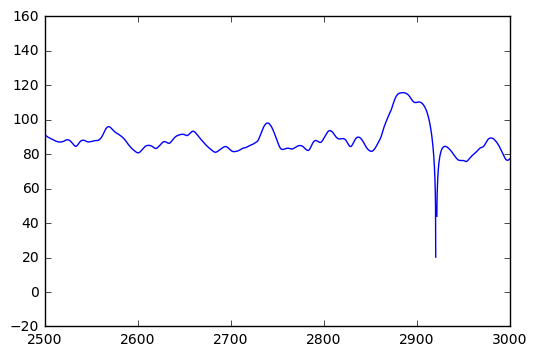

In [29]:
f, pxx = Signal(audio.emission, fs).pick(0, 5).power_spectrum()
plt.plot(f, 20.0*np.log10(lowpass(pxx, 500.0, fs)/2e-5))
plt.xlim(2500, 3000.0)